In [1]:
# Jupyter Notebook for the Data Science Project

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Create Dataframes
## mobilitytrendsUS
df_mobUS = pd.read_csv('mobilitytrendsUS.csv')
df_mobUS = df_mobUS.drop(columns=['geo_type', 'region'])
df_mobUS.head()

,transportation_type,2020/1/13,2020/1/14,2020/1/15,2020/1/16,2020/1/17,2020/1/18,2020/1/19,2020/1/20,2020/1/21,...,2020/4/15,2020/4/16,2020/4/17,2020/4/18,2020/4/19,2020/4/20,2020/4/21,2020/4/22,2020/4/23,2020/4/24
0,driving,100,102.97,105.19,108.48,125.51,115.04,90.91,102.57,103.07,...,63.03,64.11,70.71,65.07,52.71,65.15,65.0,66.49,68.00,76.68
1,transit,100,97.77,98.84,99.04,108.03,97.41,85.40,92.39,100.27,...,24.23,24.06,24.89,22.89,22.11,26.13,25.1,25.09,25.08,25.99
2,walking,100,99.59,101.87,100.60,121.36,132.38,100.10,94.79,94.84,...,50.37,50.64,54.85,52.49,45.86,53.87,51.9,52.86,52.92,58.89


In [3]:
## mobilitytrendsUScities
df_mobUScty = pd.read_csv('mobilitytrendsUScities.csv')
df_mobUScty = df_mobUScty.drop(columns='geo_type')
df_mobUScty.head()

,region,transportation_type,2020/1/13,2020/1/14,2020/1/15,2020/1/16,2020/1/17,2020/1/18,2020/1/19,2020/1/20,...,2020/4/15,2020/4/16,2020/4/17,2020/4/18,2020/4/19,2020/4/20,2020/4/21,2020/4/22,2020/4/23,2020/4/24
0,Baltimore,driving,100,105.60,108.94,109.34,125.40,89.48,82.95,93.03,...,67.35,68.11,78.93,70.45,59.35,69.60,65.67,71.43,69.95,77.55
1,Baltimore,transit,100,99.96,105.05,97.79,100.00,71.71,68.96,84.98,...,44.05,41.14,42.86,36.18,38.09,46.14,41.58,44.12,40.18,42.81
2,Baltimore,walking,100,104.72,123.02,125.76,142.25,114.08,91.54,89.69,...,68.13,65.61,75.96,70.98,65.60,71.24,65.80,72.16,66.27,74.12
3,Boston,driving,100,102.84,108.22,109.17,124.38,102.86,84.10,96.18,...,46.97,46.27,53.20,41.13,45.87,45.71,44.37,47.50,52.44,50.90
4,Boston,transit,100,100.59,105.25,104.49,111.98,109.27,95.06,101.35,...,19.35,16.55,17.61,16.55,17.71,18.30,18.15,17.89,18.50,16.91


In [4]:
## US_daily_confirmed_cases
df_daily_cases = pd.read_csv('US_daily_confirmed_cases.csv')
df_daily_cases = df_daily_cases.drop(columns=['Entity', 'Code'])
df_daily_cases.head()

,Date,Daily confirmed cases (cases)
0,13-Jan-20,0
1,14-Jan-20,0
2,15-Jan-20,0
3,16-Jan-20,0
4,17-Jan-20,0


In [5]:
## US_daily_deaths
df_daily_deaths = pd.read_csv('US_daily_deaths.csv')
df_daily_deaths = df_daily_deaths.drop(columns=['Entity', 'Code'])
df_daily_deaths.head()

,Date,Daily confirmed deaths (deaths)
0,13-Jan-20,0
1,14-Jan-20,0
2,15-Jan-20,0
3,16-Jan-20,0
4,17-Jan-20,0


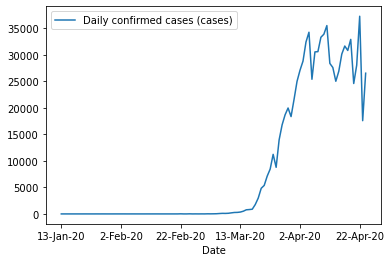

In [6]:
# Visualization (US daily cases)
df_daily_cases.plot(x='Date')

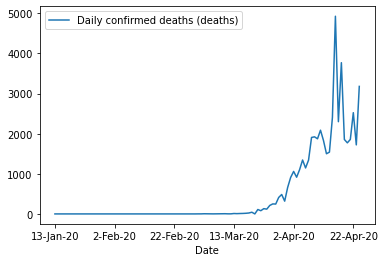

In [7]:
# Visualization (US daily deaths)
df_daily_deaths.plot(x='Date')

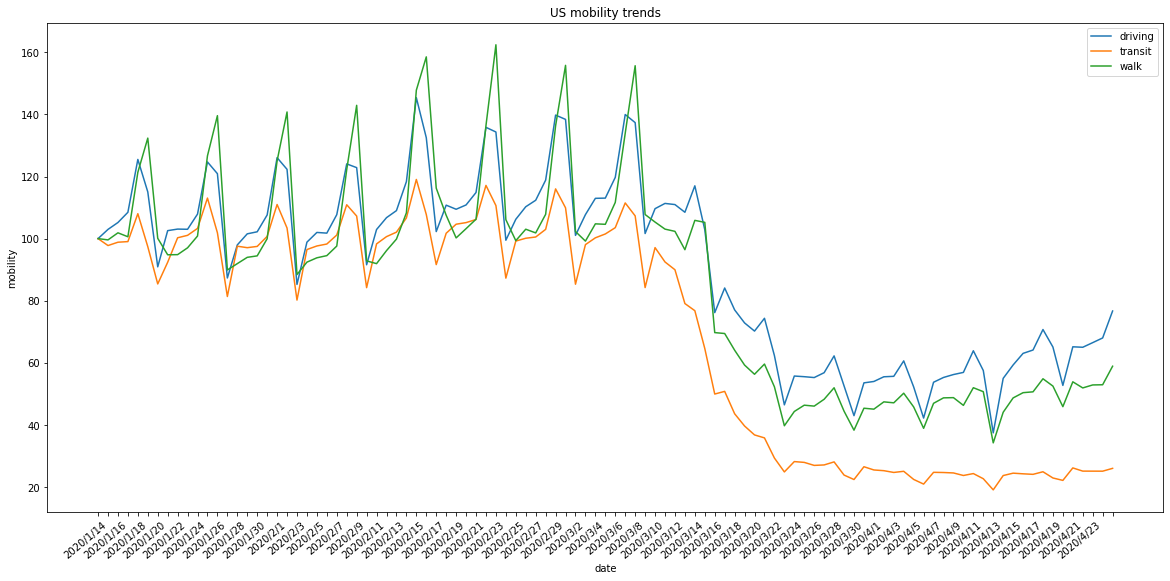

In [8]:
# Visualization (US mobility trends)
# df_mobUS
cols = df_mobUS.columns[1:]

drive = df_mobUS.values[0]
transit = df_mobUS.values[1]
walk = df_mobUS.values[2]

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(cols))) 
ax.set_xticklabels(cols)

plt.plot(cols, drive[1:], label="driving");
plt.plot(cols,transit[1:], label="transit");
plt.plot(cols,walk[1:], label="walk");

plt.xlabel('date')
plt.ylabel('mobility')
plt.title('US mobility trends')
plt.legend()

plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)

plt.show()

In [9]:
# seperating data into types of city, type of transit

# each city's type of transit
driveList = []
transitList = []
walkList = []

# each city
allCities = []
cityList = []

ttype = 1
for row in df_mobUScty.values:
    # seperating vals by transit type, city name
    if ttype % 3 == 1:
        cityList.append(row)
        
        driveList.append(row)
        
        ttype += 1
    elif ttype % 3 == 2: 
        cityList.append(row)
        
        transitList.append(row)
        
        ttype += 1
    elif ttype % 3 == 0:
        cityList.append(row)
        allCities.append(cityList)
        cityList = []
        
        walkList.append(row)
        
        ttype = 1
    else:
        raise Exception("dataError")

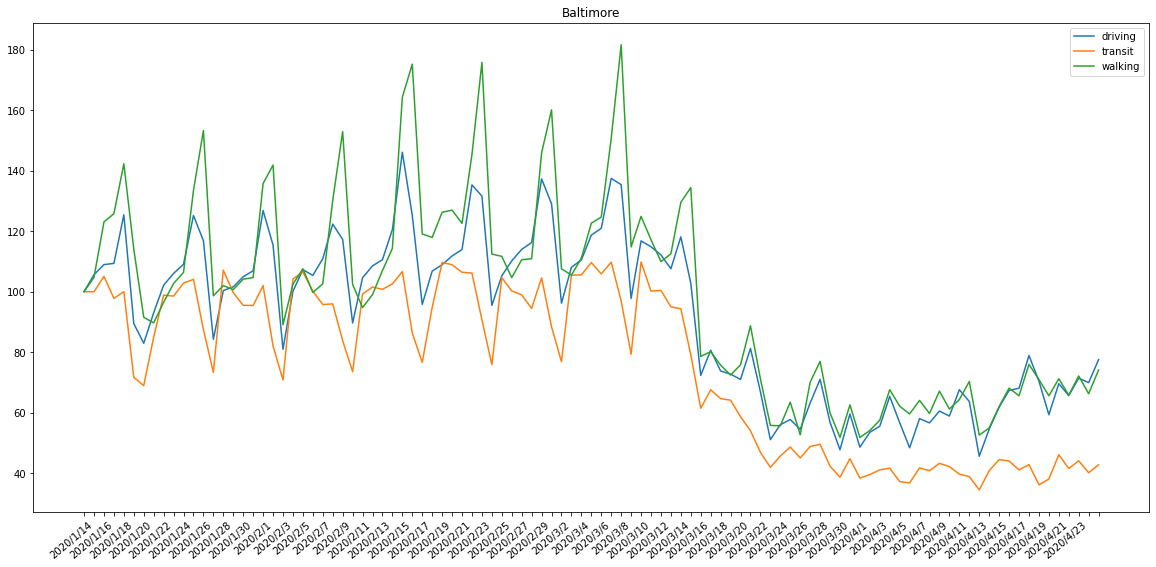

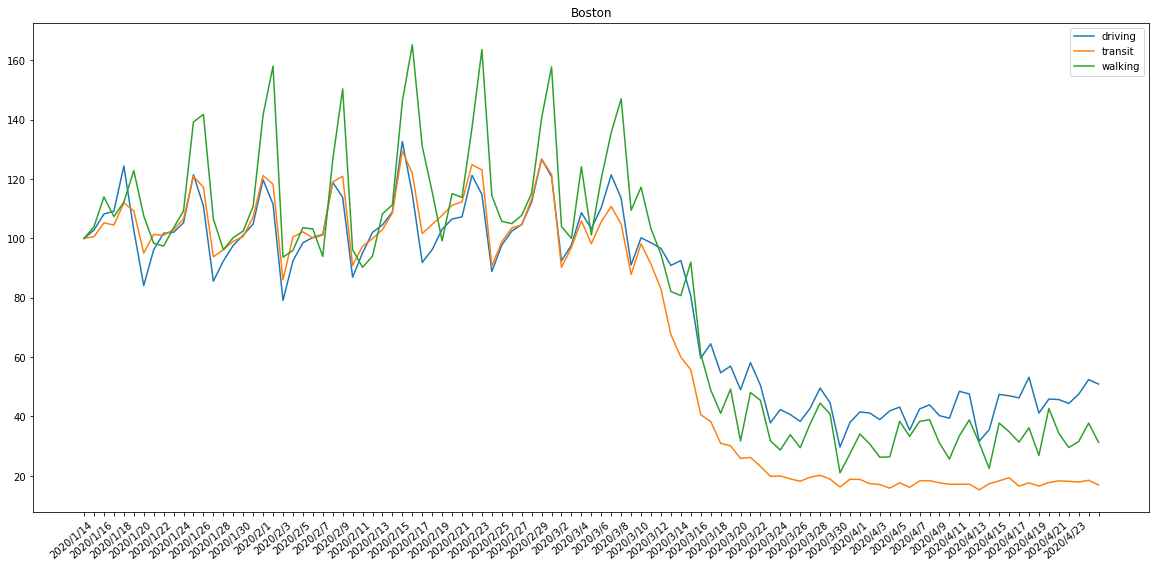

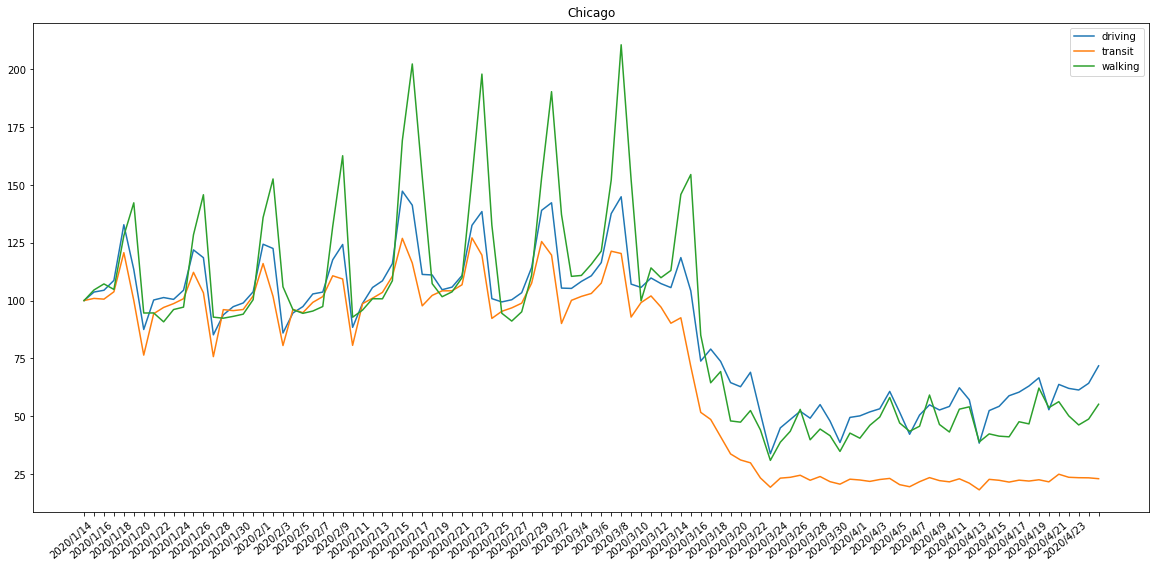

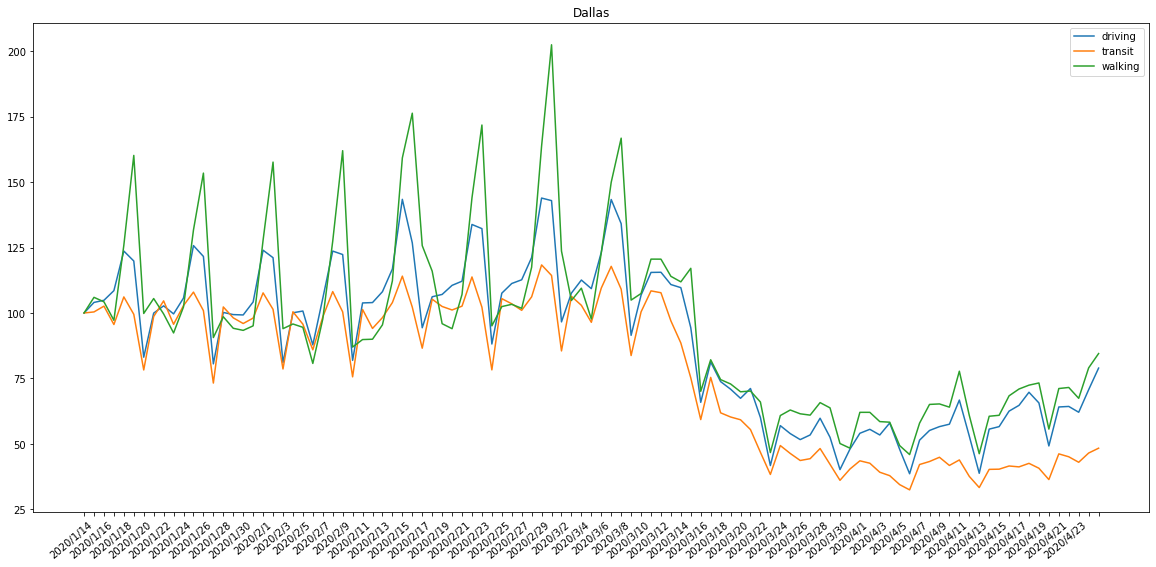

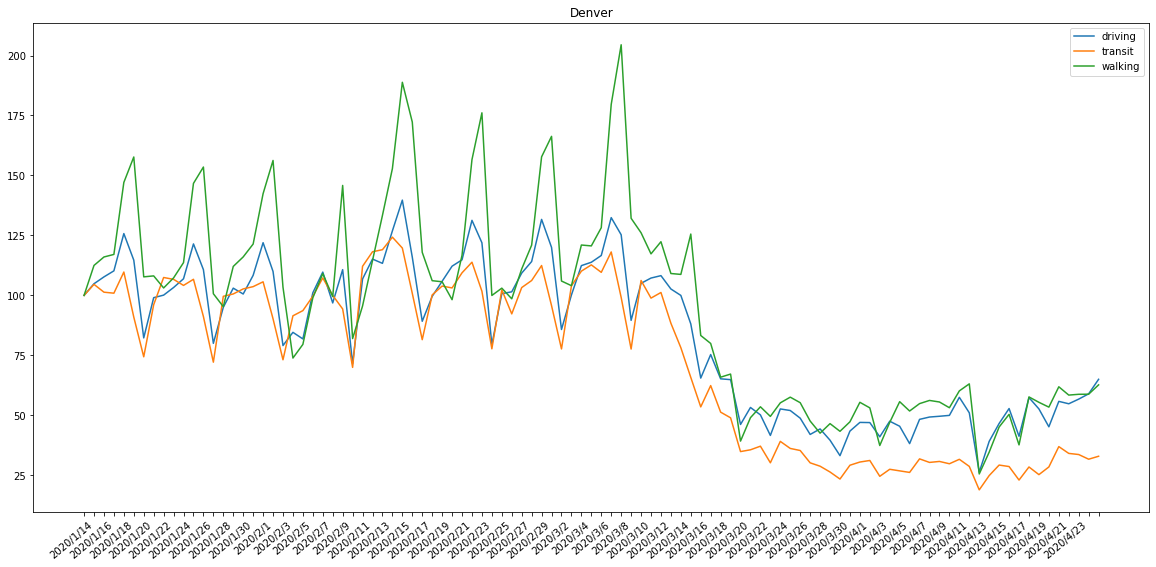

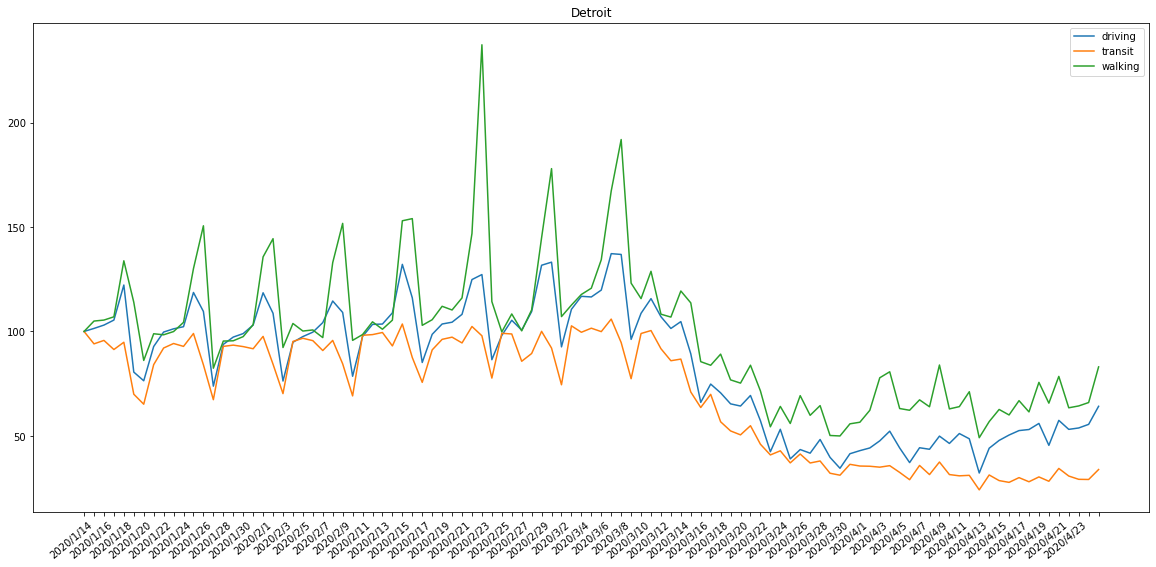

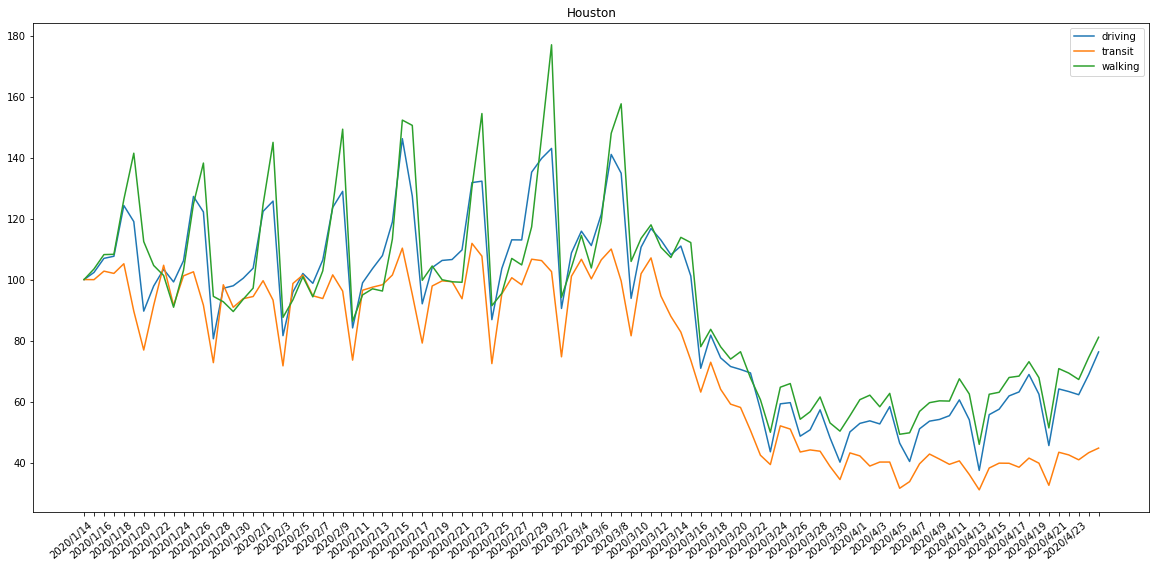

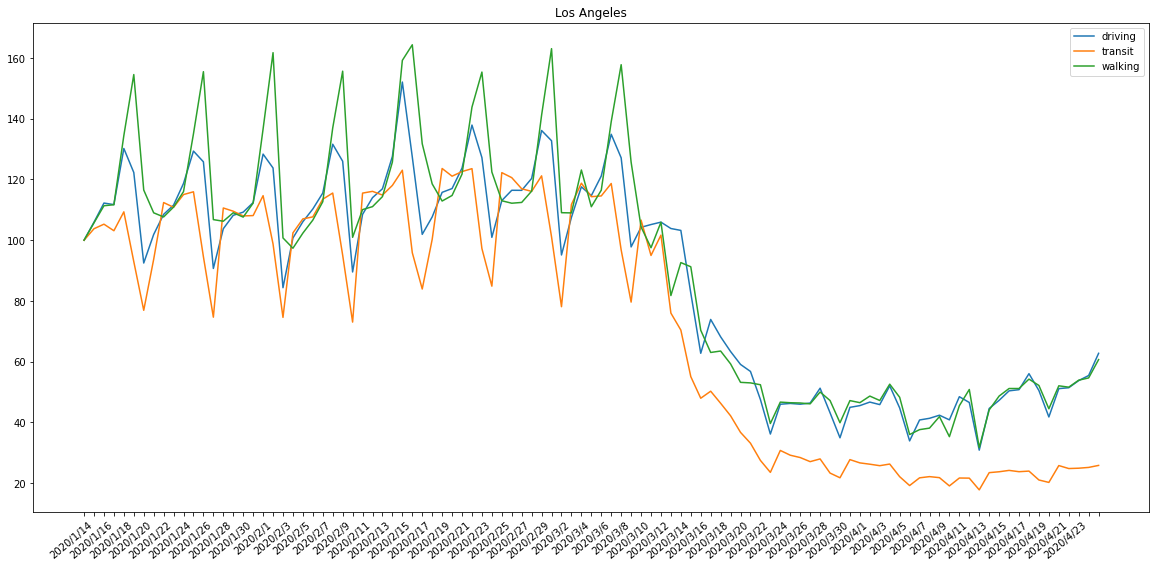

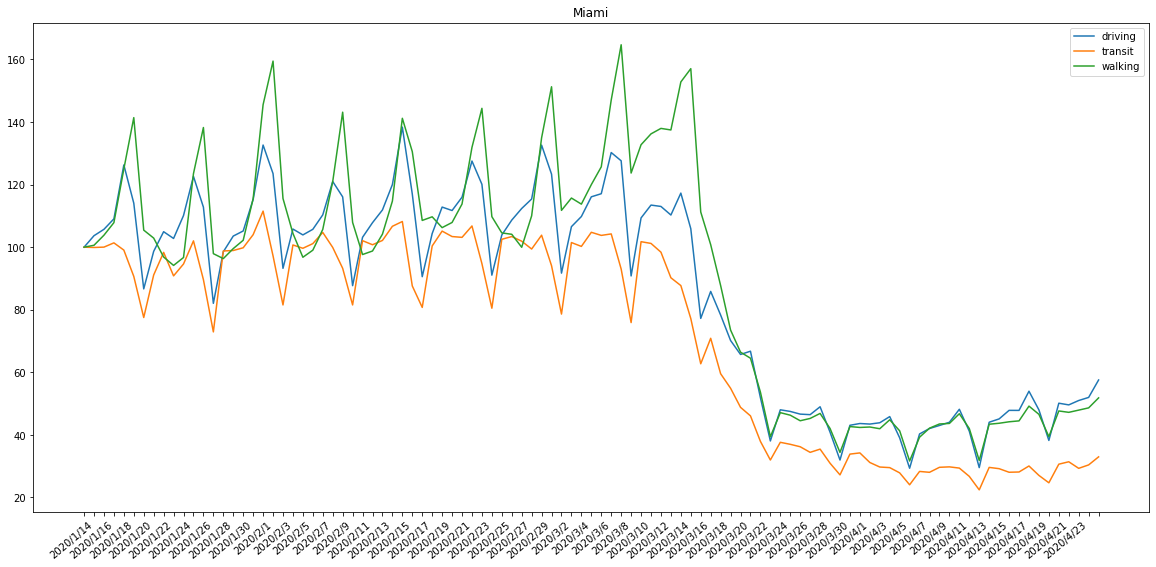

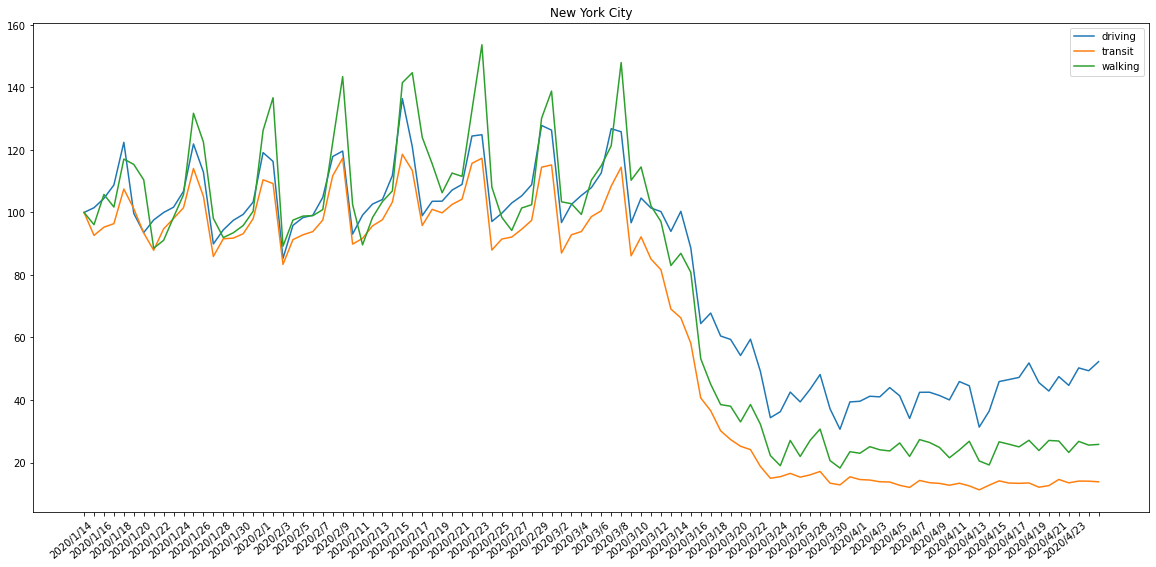

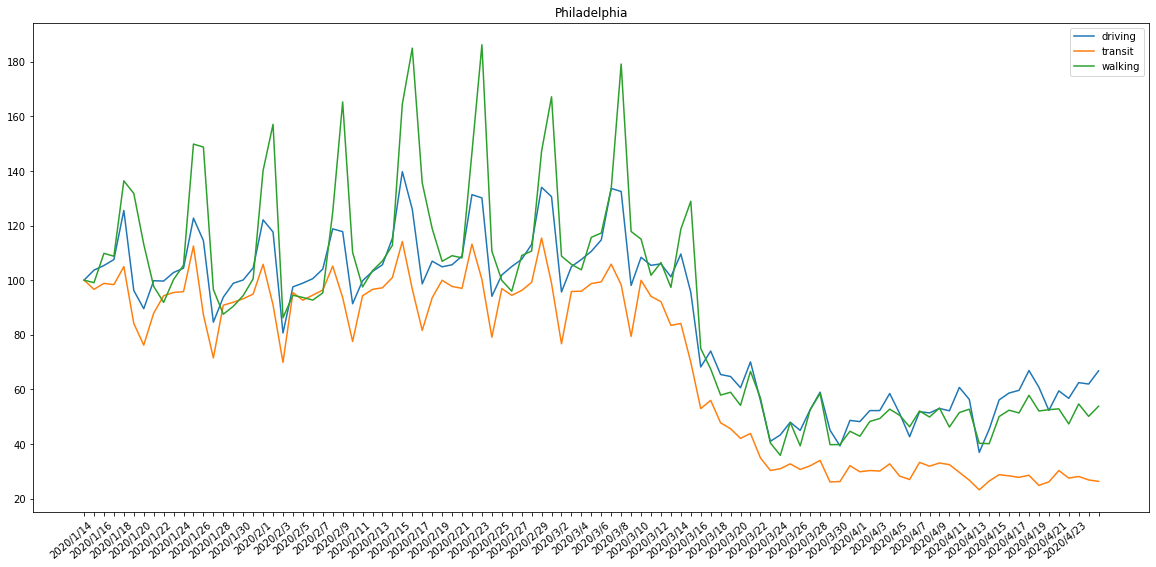

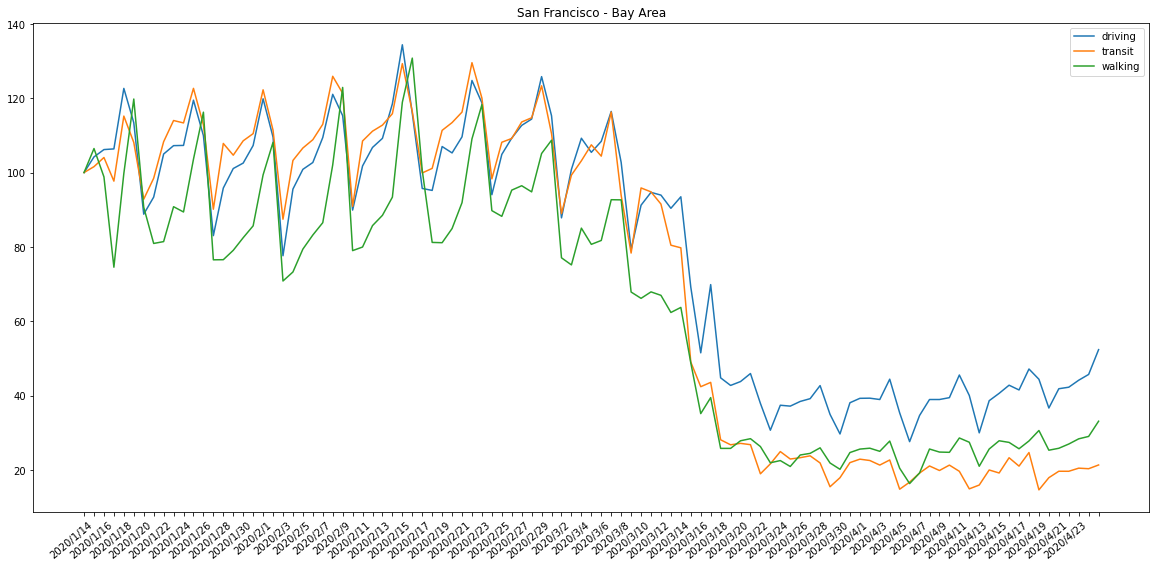

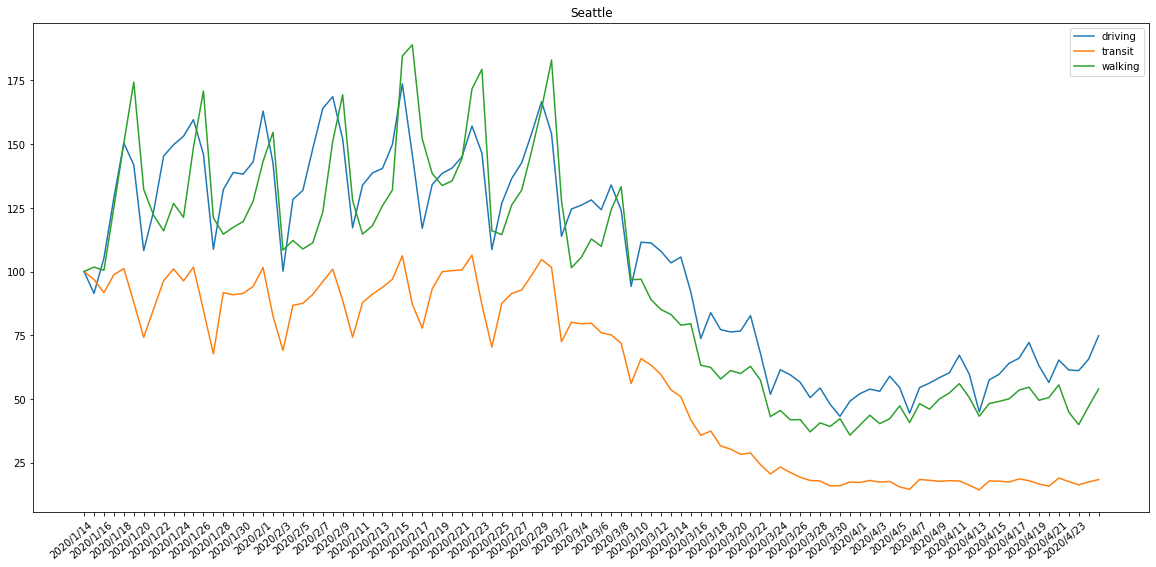

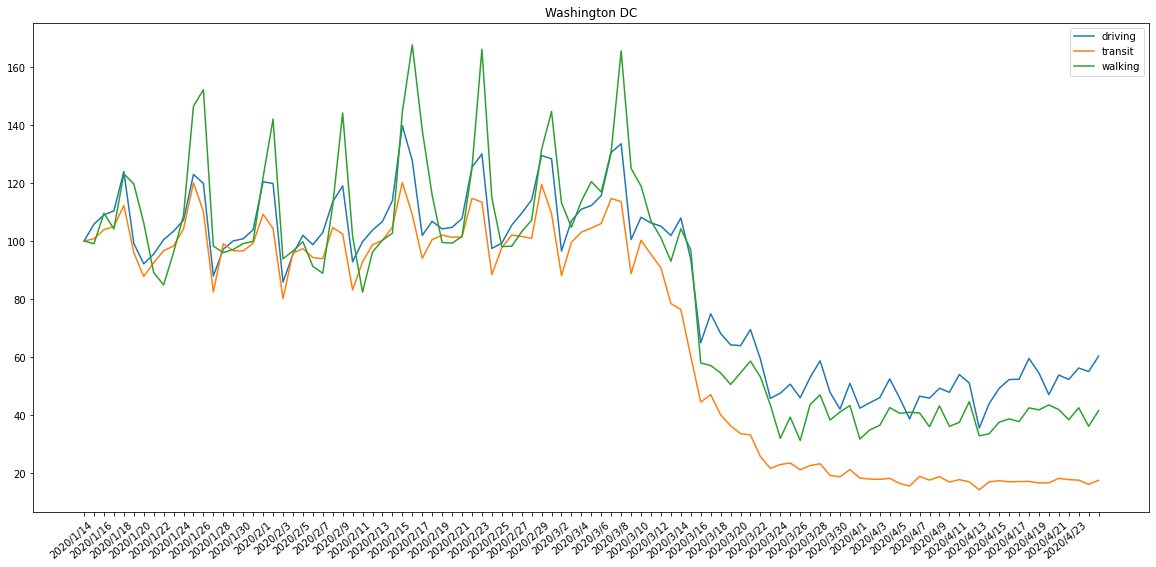

In [10]:

# Visualization (each city types of transit)
# df_mobUScty

dates = df_mobUScty.columns[2:]

for citygroup in allCities:
    cityName = ""
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_xticks(np.arange(len(dates))) 
    ax.set_xticklabels(cols)
    for city in citygroup:
        cityName = city[0]
        transtype = city[1]
        data = city[2:]
        
        plt.plot(dates, data, label=transtype)
        
    plt.title(cityName)
    plt.legend()
    
    plt.gcf().autofmt_xdate()
    plt.xticks(rotation=40)
    
    spacing = 2
    for label in ax.xaxis.get_ticklabels()[::spacing]:
        label.set_visible(False)
    
    plt.show()

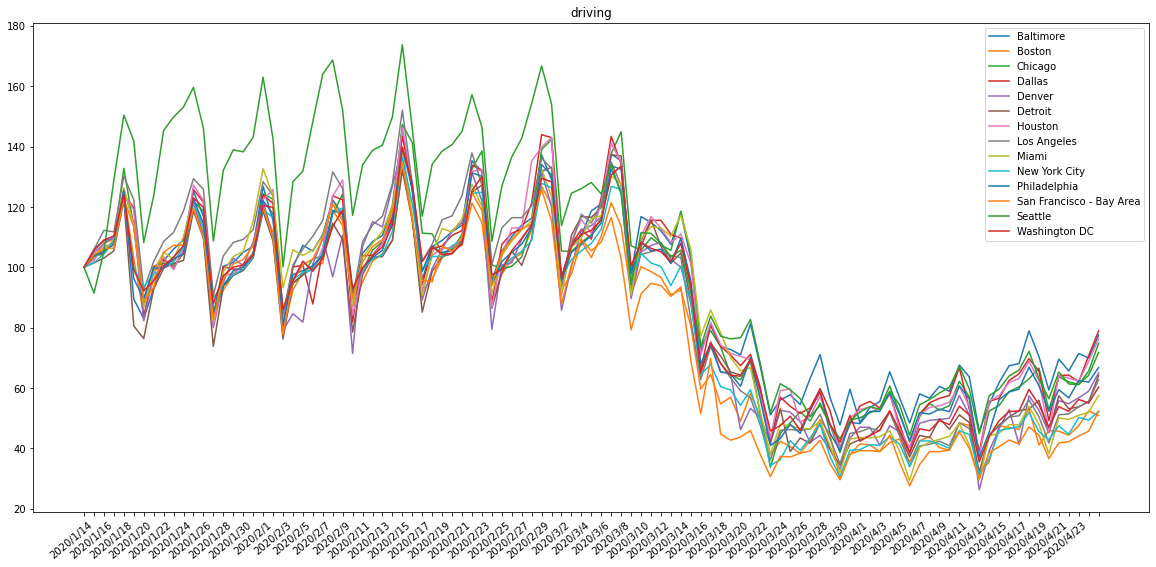

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(cols)
transtype = ""

for city in driveList:
    cityName = city[0]
    transtype = city[1]
    data = city[2:]
    
    plt.plot(dates, data, label=cityName)

    
plt.title(transtype)
plt.legend()

plt.gcf().autofmt_xdate()
plt.xticks(rotation=40)

spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
plt.show()

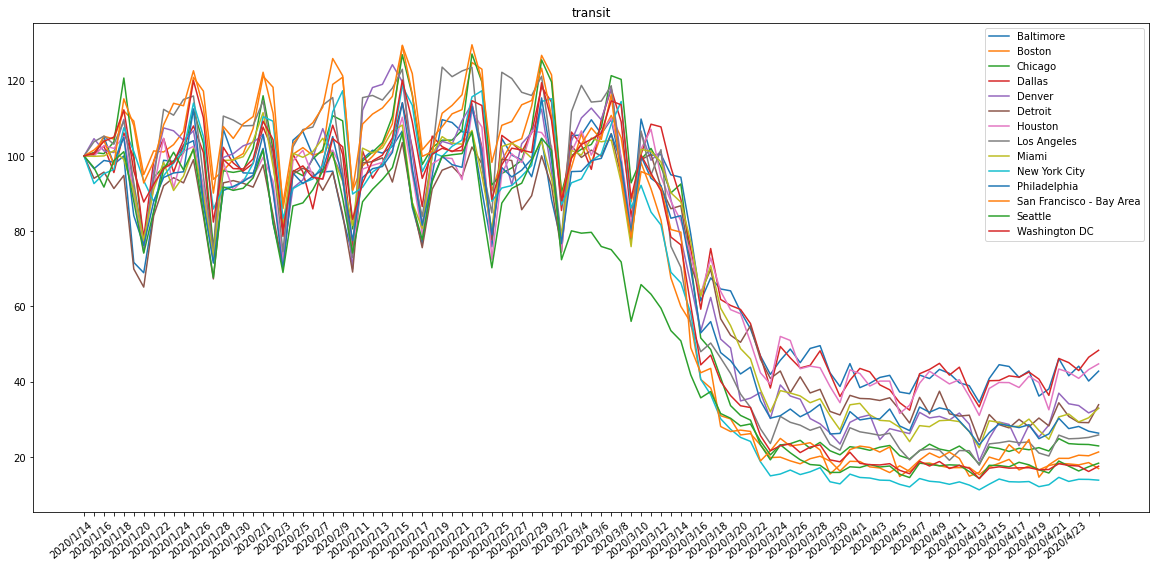

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(cols)
transtype = ""

for city in transitList:
    cityName = city[0]
    transtype = city[1]
    data = city[2:]
    
    plt.plot(dates, data, label=cityName)

    
plt.title(transtype)
plt.legend()

plt.gcf().autofmt_xdate()
plt.xticks(rotation=40)

spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
plt.show()

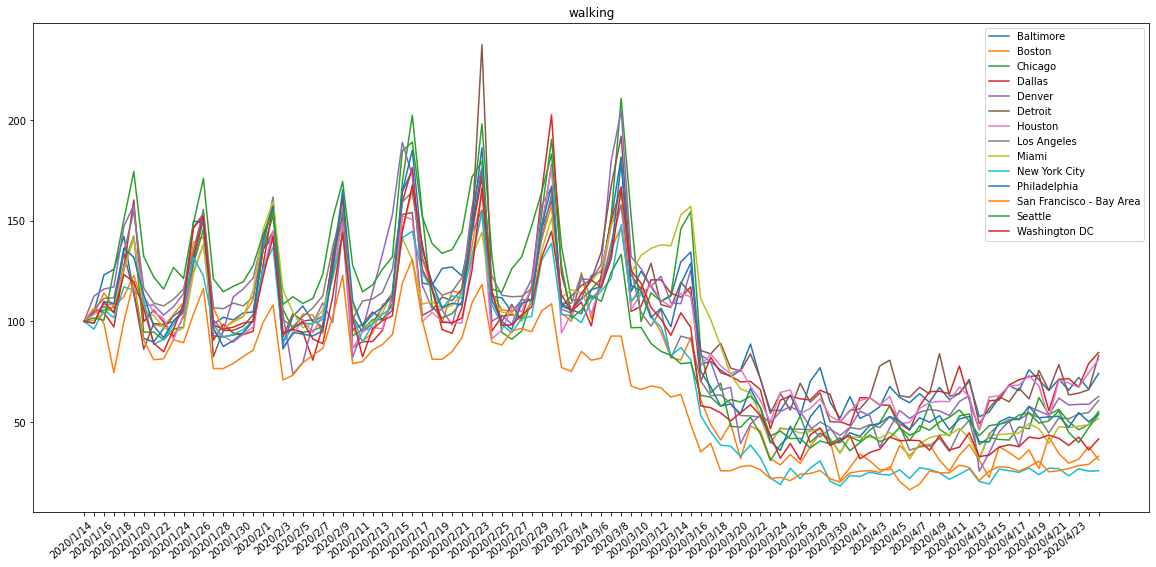

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(cols)
transtype = ""

for city in walkList:
    cityName = city[0]
    transtype = city[1]
    data = city[2:]
    
    plt.plot(dates, data, label=cityName)

    
plt.title(transtype)
plt.legend()

plt.gcf().autofmt_xdate()
plt.xticks(rotation=40)

spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
plt.show()

In [15]:
df_dailyCasesCities = pd.read_csv('U.S.cities_daily_cases.csv')
df_dailyCasesCities = df_dailyCasesCities.drop(columns=['Unnamed: 110', 'Unnamed: 111'])
df_dailyCasesCities

,region,2020/1/13,2020/1/14,2020/1/15,2020/1/16,2020/1/17,2020/1/18,2020/1/19,2020/1/20,2020/1/21,...,2020/4/21,2020/4/22,2020/4/23,2020/4/24,2020/4/25,2020/4/26,2020/4/27,2020/4/28,2020/4/29,2020/4/30
0,Baltimore,0,0,0,0,0,0,0,0,0,...,31,60,70,56,63,75,67,44,37,54
1,Boston (Suffolk),0,0,0,0,0,0,0,0,0,...,355,391,679,985,494,325,340,257,399,351
2,New York City,0,0,0,0,0,0,0,0,0,...,2980,3394,2711,2336,1258,960,2129,2392,1843,673
3,Los Angeles,0,0,0,0,0,0,0,0,0,...,877,796,978,914,664,312,642,498,387,213
4,Houston,0,0,0,0,0,0,0,0,0,...,105,85,82,51,19,7,29,29,20,19


In [16]:
df_dailyDeathsCities = pd.read_csv('U.S.cities_daily_death.csv')
df_dailyDeathsCities = df_dailyDeathsCities.drop(columns=['Unnamed: 110', 'Unnamed: 111'])
df_dailyDeathsCities

,region,2020/1/13,2020/1/14,2020/1/15,2020/1/16,2020/1/17,2020/1/18,2020/1/19,2020/1/20,2020/1/21,...,2020/4/21,2020/4/22,2020/4/23,2020/4/24,2020/4/25,2020/4/26,2020/4/27,2020/4/28,2020/4/29,2020/4/30
0,Baltimore,0,0,0,0,0,0,0,0,0,...,9,2,4,1,5,3,3,2,9,4
1,Boston (Suffolk),0,0,0,0,0,0,0,0,0,...,22,33,28,26,19,33,24,21,35,20
2,New York City,0,0,0,0,0,0,0,0,0,...,264,268,268,233,187,183,164,115,77,41
3,Los Angeles,0,0,0,0,0,0,0,0,0,...,40,41,43,39,35,39,32,41,31,18


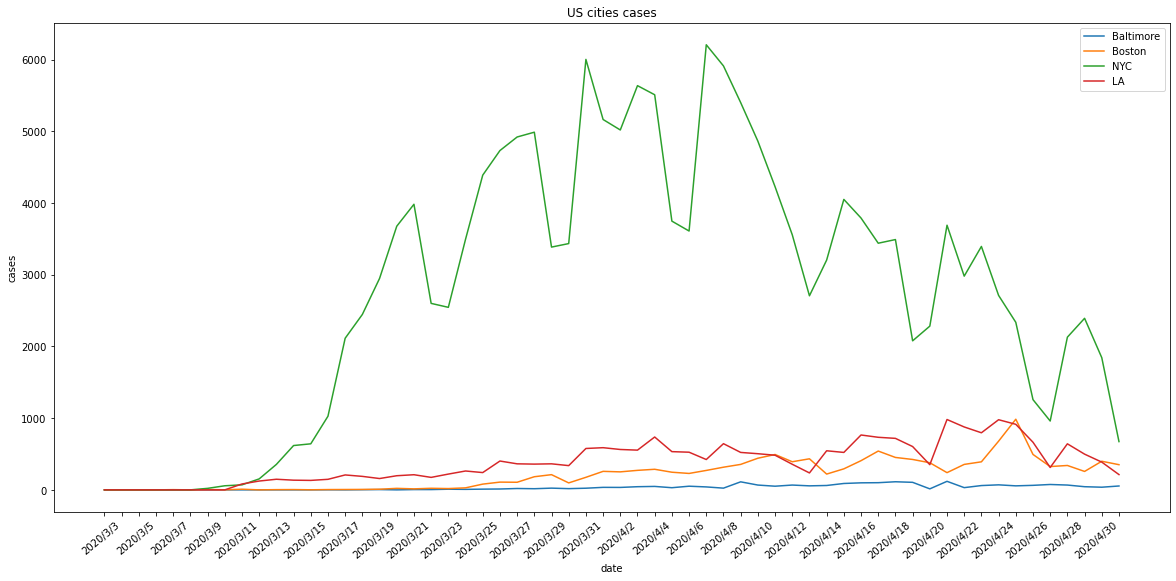

In [27]:
# Visualization (City cases)
# df_dailyCasesCities
cols = df_dailyCasesCities.columns[50:]

baltimore = df_dailyCasesCities.values[0]
boston = df_dailyCasesCities.values[1]
nyc = df_dailyCasesCities.values[2]
la = df_dailyCasesCities.values[3]

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(cols))) 
ax.set_xticklabels(cols)

plt.plot(cols, baltimore[50:], label="Baltimore");
plt.plot(cols, boston[50:], label="Boston");
plt.plot(cols, nyc[50:], label="NYC");
plt.plot(cols, la[50:], label="LA");

plt.xlabel('date')
plt.ylabel('cases')
plt.title('US cities cases')
plt.legend()

plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)

plt.show()

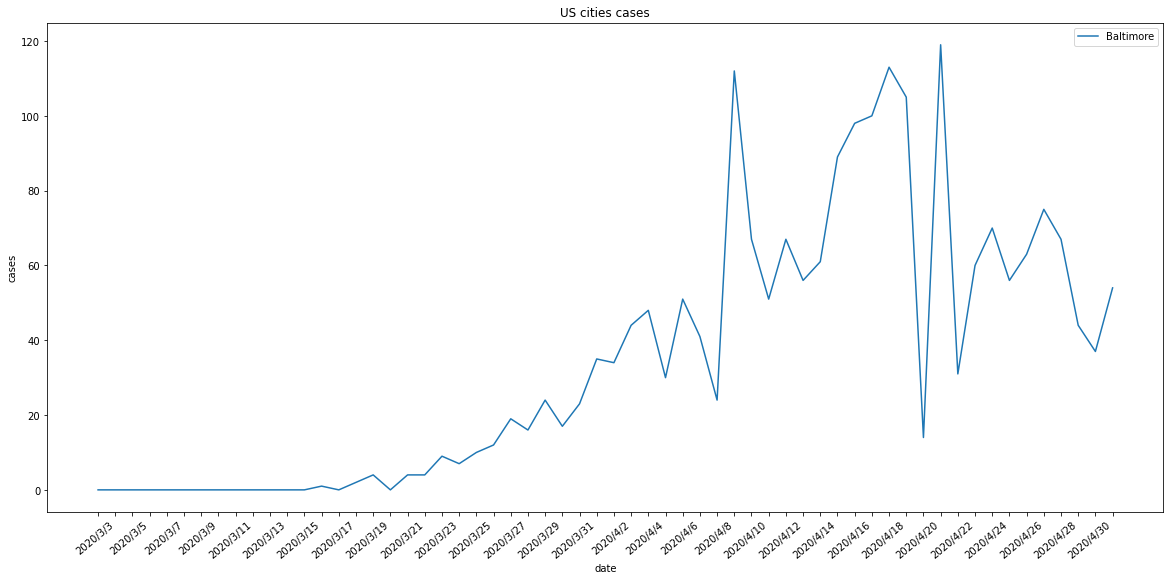

In [28]:
# Visualization (City cases)
# df_dailyCasesCities
cols = df_dailyCasesCities.columns[50:]

baltimore = df_dailyCasesCities.values[0]

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(cols))) 
ax.set_xticklabels(cols)

plt.plot(cols, baltimore[50:], label="Baltimore");

plt.xlabel('date')
plt.ylabel('cases')
plt.title('US cities cases')
plt.legend()

plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)

plt.show()

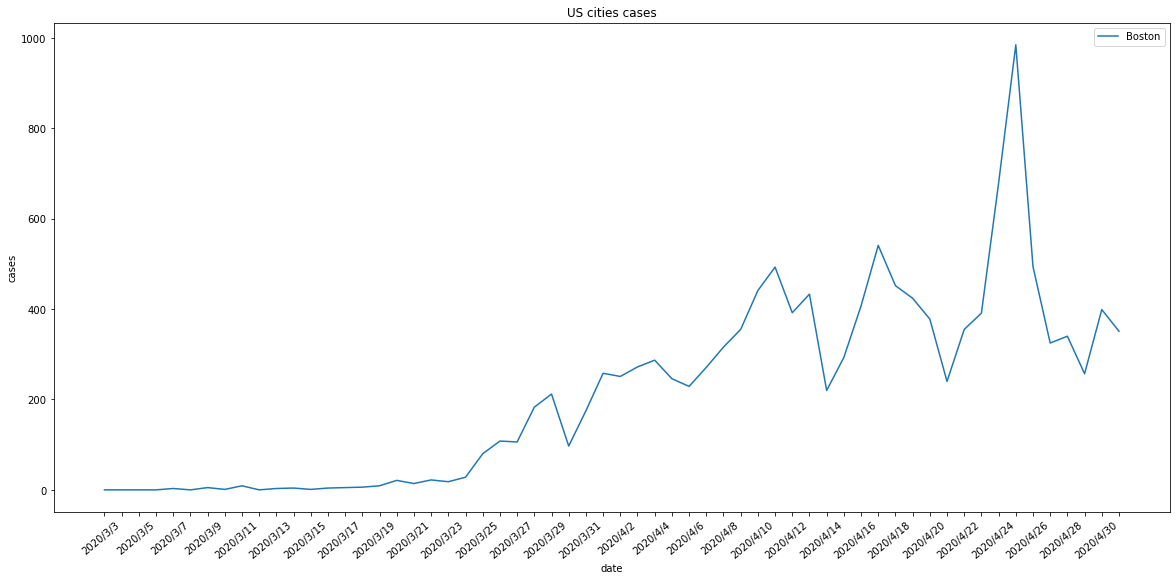

In [29]:
# Visualization (City cases)
# df_dailyCasesCities
cols = df_dailyCasesCities.columns[50:]

boston = df_dailyCasesCities.values[1]

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(cols))) 
ax.set_xticklabels(cols)

plt.plot(cols, boston[50:], label="Boston");

plt.xlabel('date')
plt.ylabel('cases')
plt.title('US cities cases')
plt.legend()

plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)

plt.show()

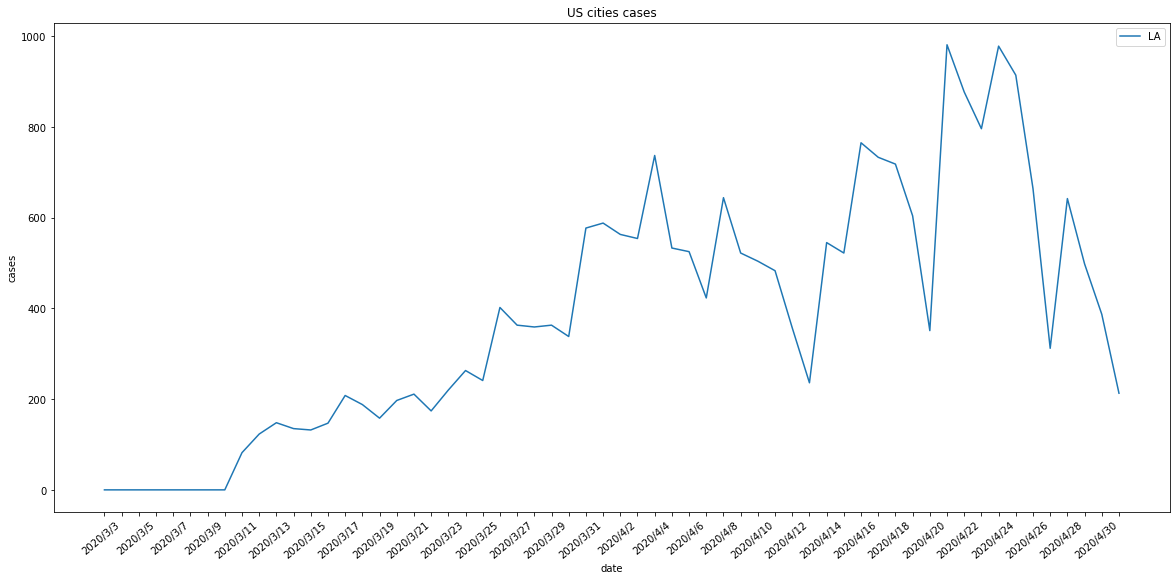

In [30]:
# Visualization (City cases)
# df_dailyCasesCities
cols = df_dailyCasesCities.columns[50:]

la = df_dailyCasesCities.values[3]

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(cols))) 
ax.set_xticklabels(cols)

plt.plot(cols, la[50:], label="LA");

plt.xlabel('date')
plt.ylabel('cases')
plt.title('US cities cases')
plt.legend()

plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)

plt.show()

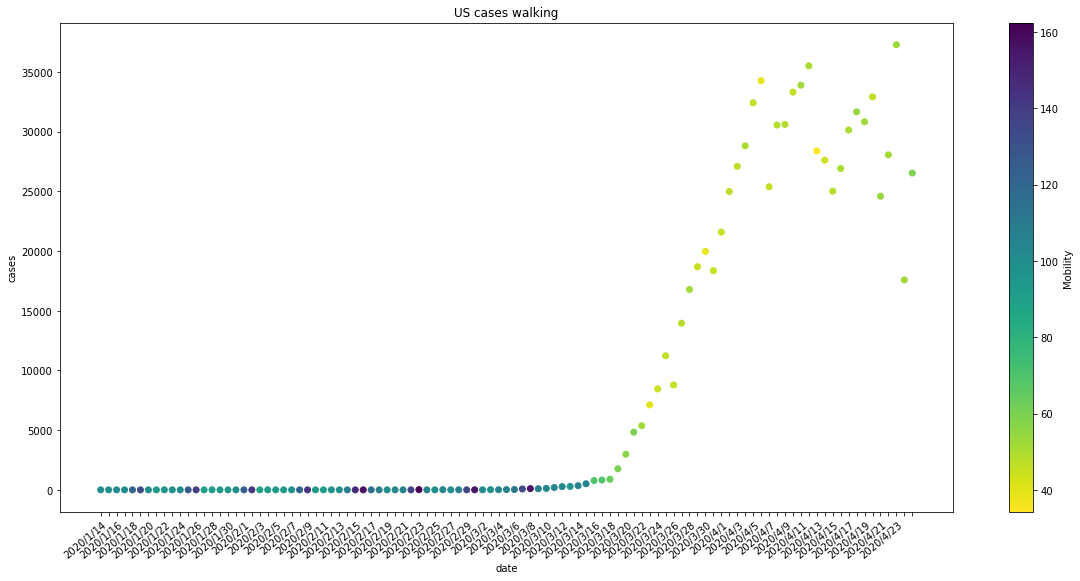

In [32]:
# visualizing mobility and number of cases
# walking
cols = df_dailyCasesCities.columns[1:]

walking = df_mobUS.values[2][1:]
dates = df_mobUS.columns[1:]
daily_cases = df_daily_cases['Daily confirmed cases (cases)']

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(cols)

plt.xlabel('date')
plt.ylabel('cases')
plt.title('US cases walking')

plt.scatter(dates, daily_cases, c=walking, cmap='viridis_r')
plt.colorbar().set_label('Mobility')

plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)

plt.show()
# # df_cases_and_mobilityUS

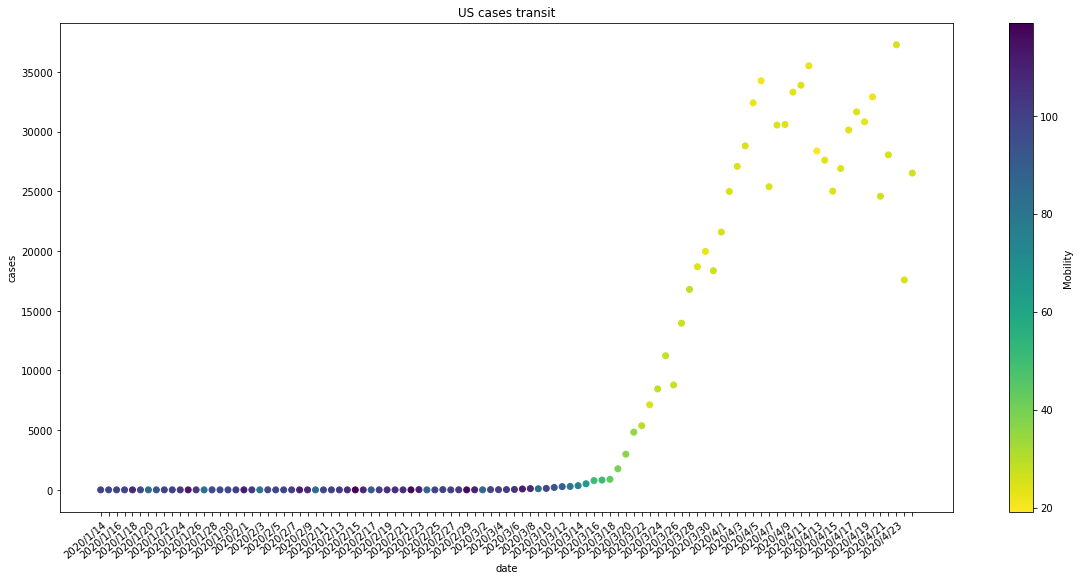

In [33]:
# visualizing mobility and number of cases
# transit
transit = df_mobUS.values[1][1:]
dates = df_mobUS.columns[1:]


daily_cases = df_daily_cases['Daily confirmed cases (cases)']
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(cols)
plt.xlabel('date')
plt.ylabel('cases')
plt.title('US cases transit')

plt.scatter(dates, daily_cases, c=transit, cmap='viridis_r')

plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
    
plt.colorbar().set_label('Mobility')
plt.show()
# # df_cases_and_mobilityUS

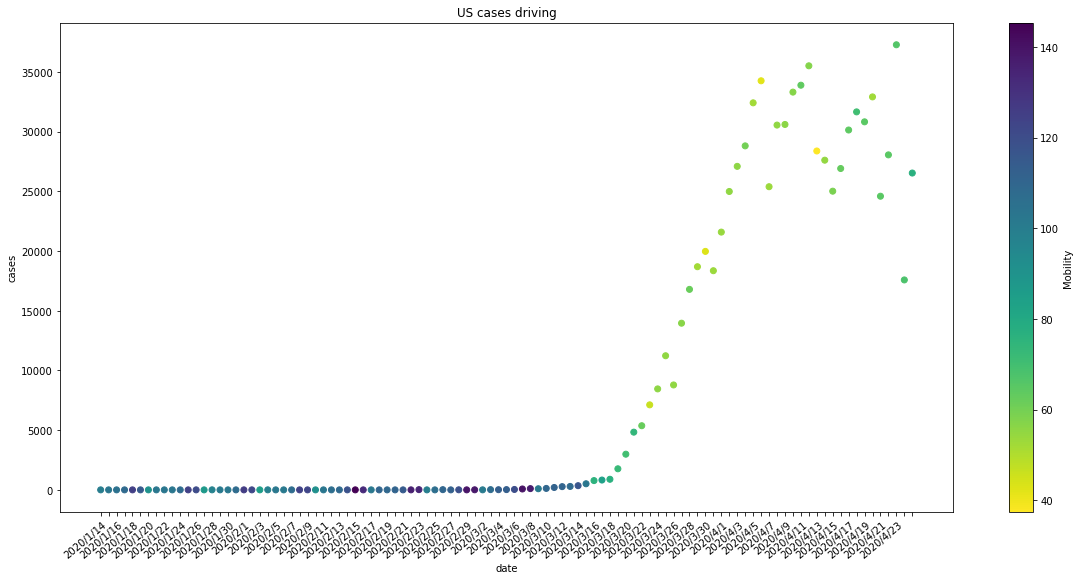

In [34]:
# visualizing mobility and number of cases
# driving
driving = df_mobUS.values[0][1:]
dates = df_mobUS.columns[1:]
daily_cases = df_daily_cases['Daily confirmed cases (cases)']

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(cols)
plt.xlabel('date')
plt.ylabel('cases')
plt.title('US cases driving')

plt.scatter(dates, daily_cases, c=driving, cmap='viridis_r')

plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
    
plt.colorbar().set_label('Mobility')
plt.show()
# # df_cases_and_mobilityUS

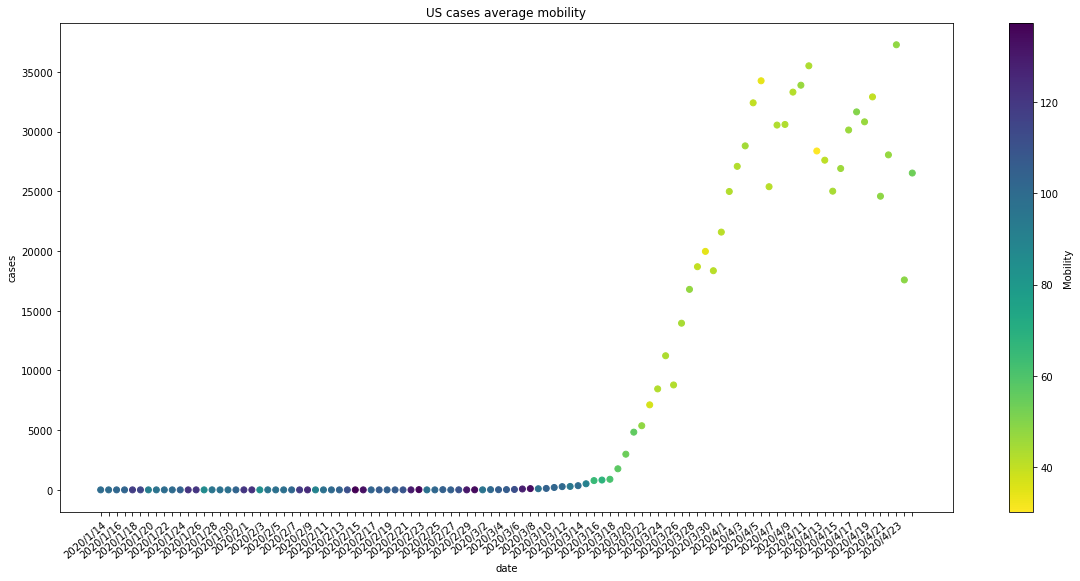

In [35]:
# visualizing mobility and number of cases
# average_mobility
average_mobility = [(x + y + z) / 3 for x, y, z in zip(driving, transit, walking)]

dates = df_mobUS.columns[1:]

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(cols)
plt.xlabel('date')
plt.ylabel('cases')
plt.title('US cases average mobility')

plt.scatter(dates, daily_cases, c=average_mobility, cmap='viridis_r')


plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
    
plt.colorbar().set_label('Mobility')
plt.show()

# df_cases_and_mobilityUS

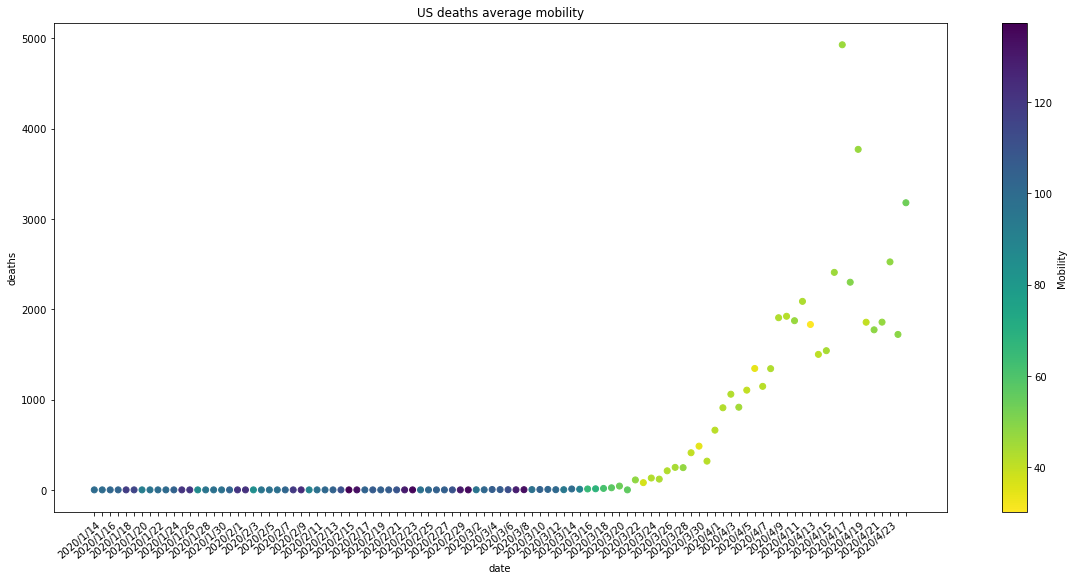

In [36]:
# average mobility
daily_deaths = df_daily_deaths['Daily confirmed deaths (deaths)']
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(cols)
plt.xlabel('date')
plt.ylabel('deaths')
plt.title('US deaths average mobility')

plt.scatter(dates, daily_deaths, c=average_mobility, cmap='viridis_r')


plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
    
plt.colorbar().set_label('Mobility')
plt.show()

In [37]:
## GET AVERAGE MOBILITY FROM 4 CITIES
## baltimore
balti = df_mobUScty.values[0:3]
balt = []
for row in balti:
    balt.append(row[2:])
# print(balt)
average_mobility_balt = [(x + y + z) / 3 for x, y, z in zip(balt[0], balt[1], balt[2])]
# print(average_mobility_balt)

## Boston
bosto = df_mobUScty.values[3:6]
# print(bosto)
bost = []
for row in bosto:
    bost.append(row[2:])
# print(bost)
average_mobility_bost = [(x + y + z) / 3 for x, y, z in zip(bost[0], bost[1], bost[2])]
# print(average_mobility_bost)

## LA
LAn = df_mobUScty.values[21:24]
# print(LAn)
LA = []
for row in LAn:
    LA.append(row[2:])
# print(LA)
average_mobility_LA = [(x + y + z) / 3 for x, y, z in zip(LA[0], LA[1], LA[2])]
# print(average_mobility_LA)

## NYC
NYCi = df_mobUScty.values[27:30]
# print(NYCi)
NYC = []
for row in NYCi:
    NYC.append(row[2:])
# print(NYC)
average_mobility_NYC = [(x + y + z) / 3 for x, y, z in zip(NYC[0], NYC[1], NYC[2])]
# print(average_mobility_NYC)

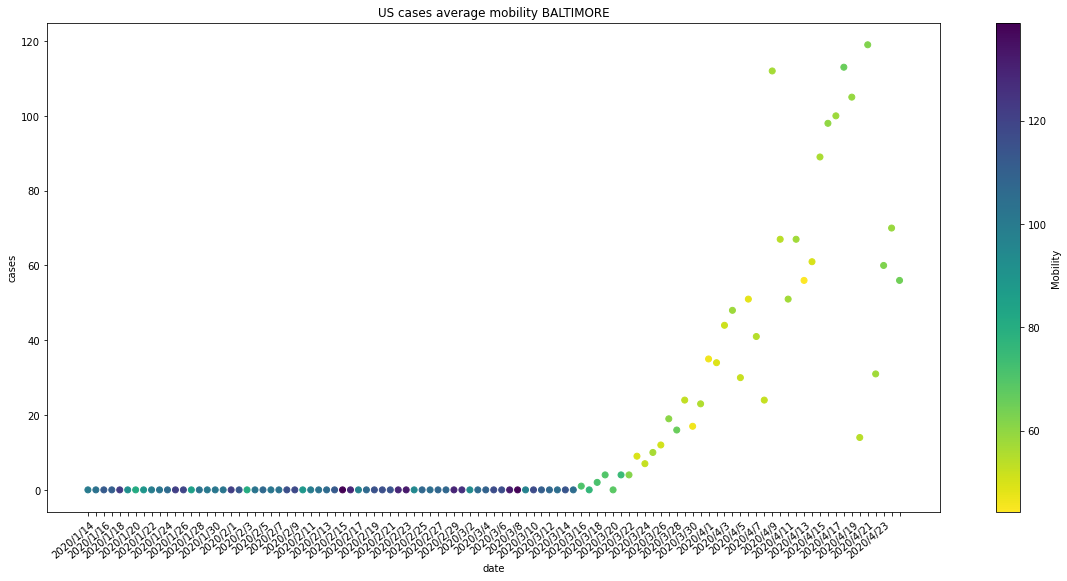

In [38]:
# BALTIMORE
# visualizing mobility and number of cases for cities
# average_mobility cities
baltimore = df_dailyCasesCities.values[0][1:104]
dates = list(df_dailyCasesCities.columns)[1:104]
# print(dates)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(dates)
plt.xlabel('date')
plt.ylabel('cases')
plt.title('US cases average mobility BALTIMORE')

plt.scatter(dates, baltimore, c=average_mobility_balt, cmap='viridis_r')


plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
    
plt.colorbar().set_label('Mobility')
plt.show()

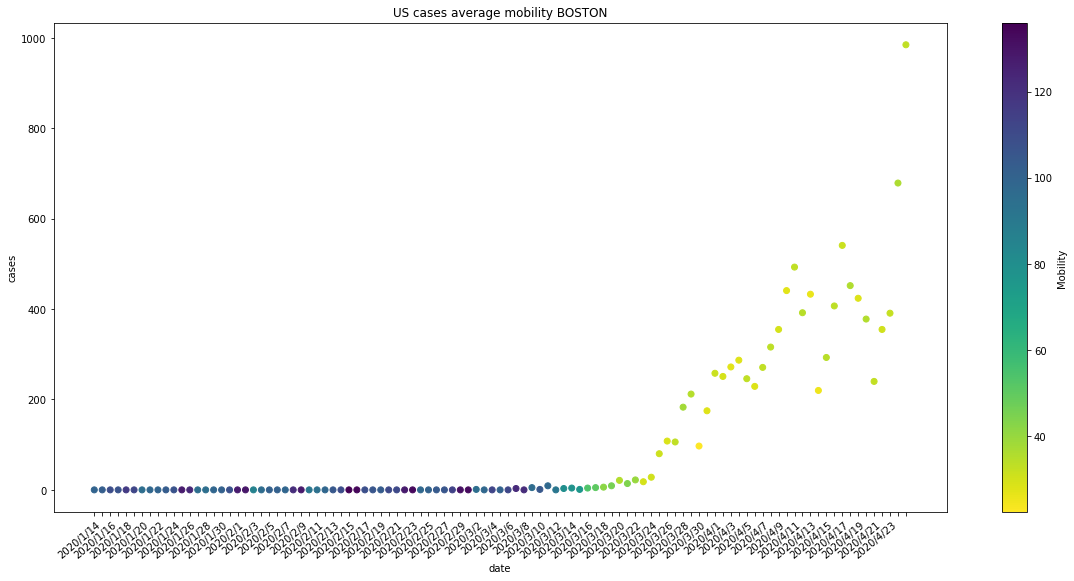

In [39]:
# BOSTON
# visualizing mobility and number of cases for cities
# average_mobility cities
boston = df_dailyCasesCities.values[1][1:104]
dates = list(df_dailyCasesCities.columns)[1:104]
# print(dates)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(dates)
plt.xlabel('date')
plt.ylabel('cases')
plt.title('US cases average mobility BOSTON')

plt.scatter(dates, boston, c=average_mobility_bost, cmap='viridis_r')


plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
    
plt.colorbar().set_label('Mobility')
plt.show()

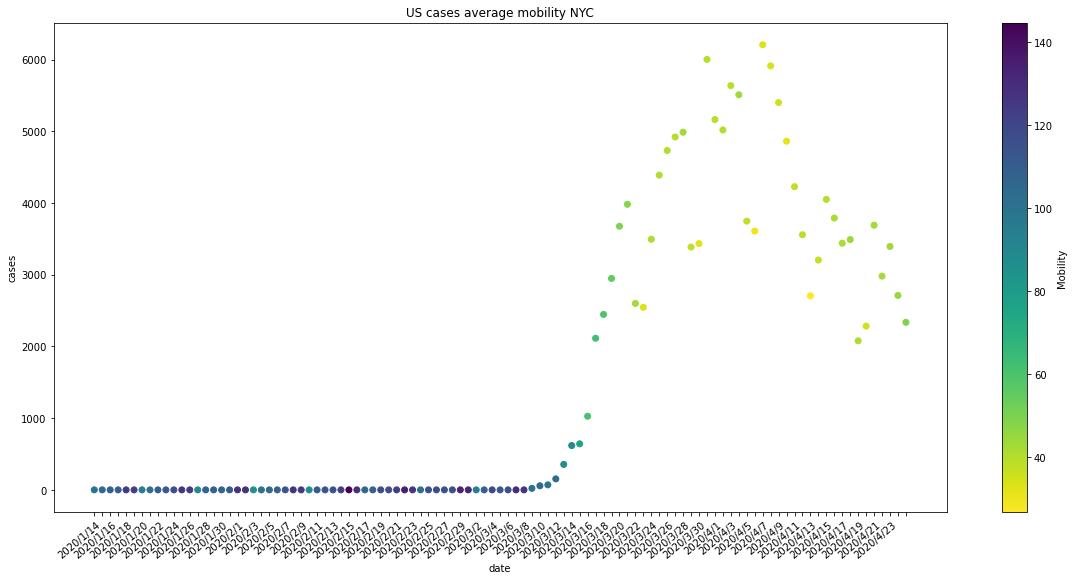

In [42]:
# NYC
# visualizing mobility and number of cases for cities
# average_mobility cities
la = df_dailyCasesCities.values[2][1:104]
dates = list(df_dailyCasesCities.columns)[1:104]

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(dates)
plt.xlabel('date')
plt.ylabel('cases')
plt.title('US cases average mobility NYC')

plt.scatter(dates, la, c=average_mobility_LA, cmap='viridis_r')


plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
    
plt.colorbar().set_label('Mobility')
plt.show()

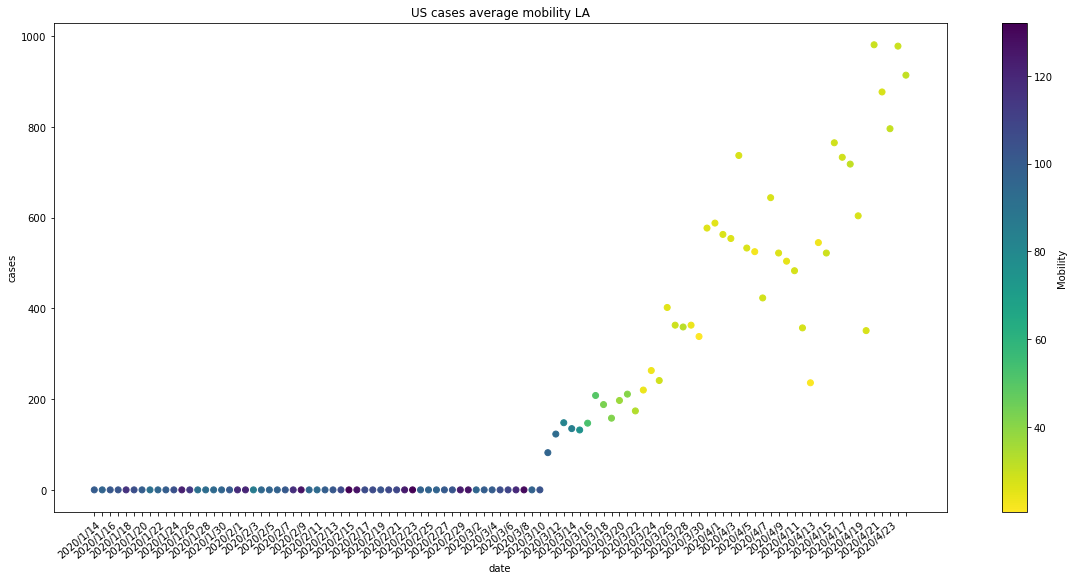

In [43]:

# LA
# visualizing mobility and number of cases for cities
# average_mobility cities
nyc = df_dailyCasesCities.values[3][1:104]
dates = list(df_dailyCasesCities.columns)[1:104]

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(np.arange(len(dates))) 
ax.set_xticklabels(dates)
plt.xlabel('date')
plt.ylabel('cases')
plt.title('US cases average mobility LA')

plt.scatter(dates, nyc, c=average_mobility_NYC, cmap='viridis_r')


plt.gcf().autofmt_xdate()
plt.xticks(rotation=40) 
spacing = 2
for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
    
plt.colorbar().set_label('Mobility')
plt.show()